# Clustering menggunakan K-means

## load data.csv

In [1]:
import pandas as pd

data = pd.read_csv('/content/session_page_matrix.csv')
print(data)

                      SESSION_ID  PAGE_1  PAGE_10  PAGE_100  PAGE_101  \
0                  ***.novo.dk_1       1        0         0         0   
1                  ***.novo.dk_2       0        0         0         0   
2      001.msy4.communique.net_1       0        0         0         0   
3               007.thegap.com_1       0        0         0         0   
4               007.thegap.com_2       0        1         0         0   
...                          ...     ...      ...       ...       ...   
94830   dialup-1-31.gw.umn.edu_1       0        0         0         0   
94831   dialup-1-32.gw.umn.edu_1       0        0         0         0   
94832   dialup-1-34.gw.umn.edu_1       0        0         0         0   
94833   dialup-1-45.gw.umn.edu_1       0        0         0         0   
94834   dialup-1-45.gw.umn.edu_2       0        0         0         0   

       PAGE_102  PAGE_103  PAGE_104  PAGE_105  PAGE_106  ...  PAGE_90  \
0             0         0         0         0     

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Bersihkan kolom non-numerik (SESSION_ID)
X = data.drop(columns=["SESSION_ID"]).fillna(0)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.85566656 -0.1042255  -0.06426772 ... -0.07109177 -0.08424743
  -0.11582948]
 [-0.49039197 -0.1042255  -0.06426772 ... -0.07109177 -0.08424743
  -0.11582948]
 [-0.49039197 -0.1042255  -0.06426772 ... -0.07109177 -0.08424743
  -0.11582948]
 ...
 [-0.49039197 -0.1042255  -0.06426772 ... -0.07109177 -0.08424743
  -0.11582948]
 [-0.49039197 -0.1042255  -0.06426772 ... -0.07109177 -0.08424743
  -0.11582948]
 [-0.49039197 -0.1042255  -0.06426772 ... -0.07109177 -0.08424743
  -0.11582948]]


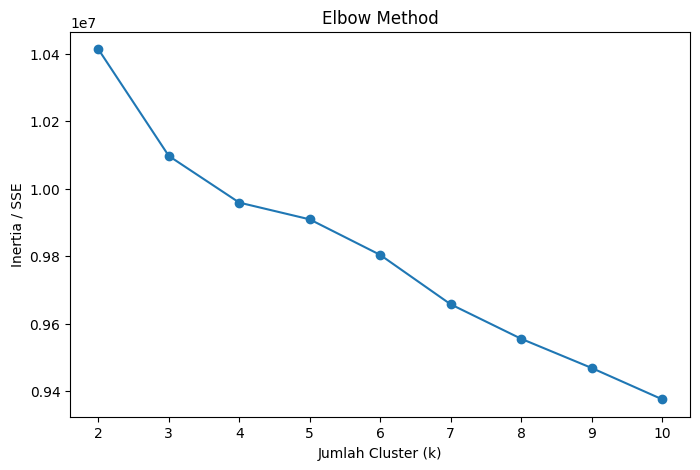

In [5]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia / SSE")
plt.title("Elbow Method")
plt.show()

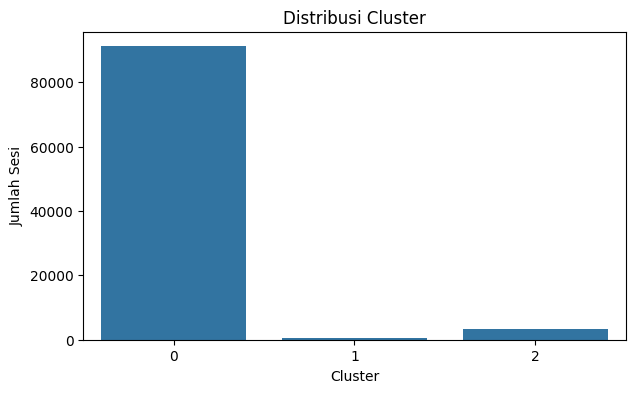

In [9]:
# Jalankan K-Means (
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
data["cluster"] = kmeans.fit_predict(X_scaled)

# Tampilkan distribusi cluster
plt.figure(figsize=(7,4))
sns.countplot(x=data["cluster"])
plt.title("Distribusi Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Sesi")
plt.show()


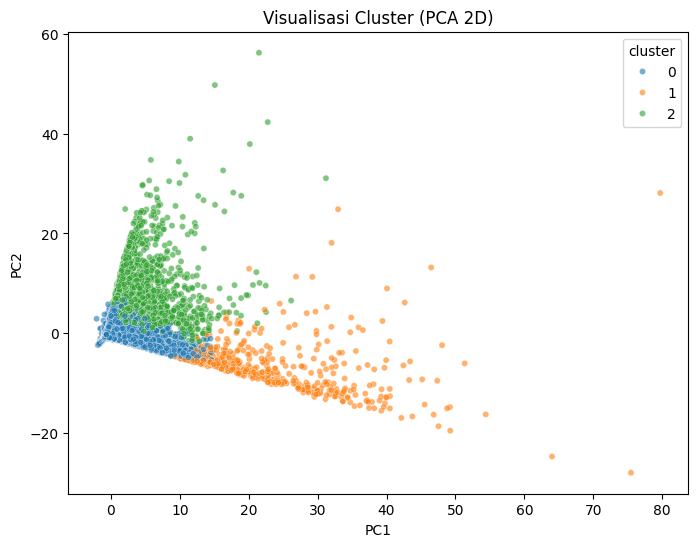

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

data["PC1"] = pca_result[:, 0]
data["PC2"] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x="PC1", y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.6,
    s=20
)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

## Load data webuage

In [19]:
import pandas as pd
# ganti path sesuai file kamu
df = pd.read_csv("/content/step10_matrix.csv", sep=";", header=0)

print(df)


               SESSION_ID  PAGE_1  PAGE_2
0       109.192.104.209_1       1       0
1        109.192.104.86_2       1       0
2       109.192.109.233_3       0       1
3       109.192.111.243_4       1       0
4       109.192.117.151_5       1       0
...                   ...     ...     ...
68043  99.61.80.189_68044       1       0
68044  99.61.82.132_68045       1       0
68045  99.61.82.209_68046       1       0
68046   99.61.84.80_68047       0       1
68047  99.61.87.131_68048       1       0

[68048 rows x 3 columns]


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df["PAGE_1"] = df["PAGE_1"].astype(int)
df["PAGE_2"] = df["PAGE_2"].astype(int)

X = df[["PAGE_1", "PAGE_2"]]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.70791202 -0.70996907]
 [ 0.70791202 -0.70996907]
 [-1.40814321  1.40739848]
 ...
 [ 0.70791202 -0.70996907]
 [-1.40814321  1.40739848]
 [ 0.70791202 -0.70996907]]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


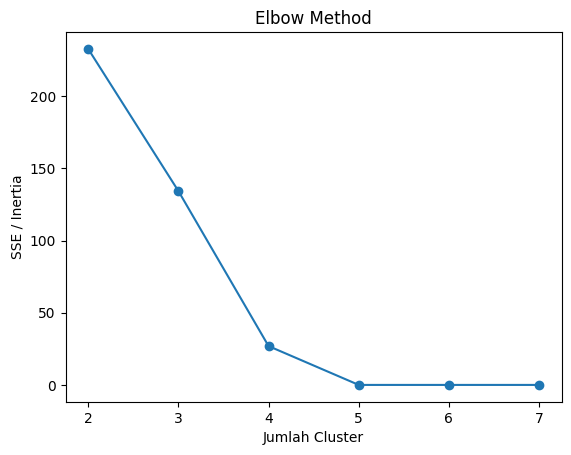

In [23]:
# melihat jumlah cluster terbaik
inertia = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("SSE / Inertia")
plt.show()

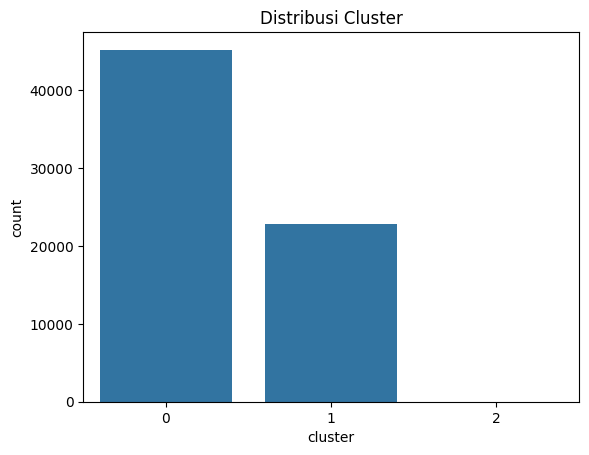

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df["cluster"] = kmeans.fit_predict(X_scaled)
 #distribusi cluster
sns.countplot(x=df["cluster"])
plt.title("Distribusi Cluster")
plt.show()

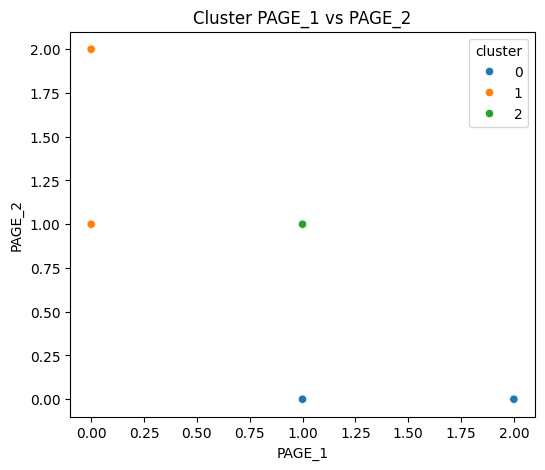

In [25]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x="PAGE_1", y="PAGE_2",
    hue="cluster",
    palette="tab10"
)
plt.title("Cluster PAGE_1 vs PAGE_2")
plt.show()